In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load
import graphviz

In [2]:
# Read the Netflix dataset
netflix_data = pd.read_csv('../data/netflix_titles.csv')

# Cell 3: Display basic info
netflix_data.info()
netflix_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Drop rows with missing values
netflix_data_cleaned = netflix_data.dropna()

# Remove duplicate rows based on specified columns
cleaned_data = netflix_data_cleaned.drop_duplicates(subset=["title"])

In [4]:
print(cleaned_data['type'].unique())

['Movie' 'TV Show']


C:\Users\Zeeno\AppData\Local\Temp\ipykernel_1924\883831412.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x="type", palette="Set2")
C:\Users\Zeeno\AppData\Local\Temp\ipykernel_1924\883831412.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="Set3")


Text(0, 0.5, 'Country')

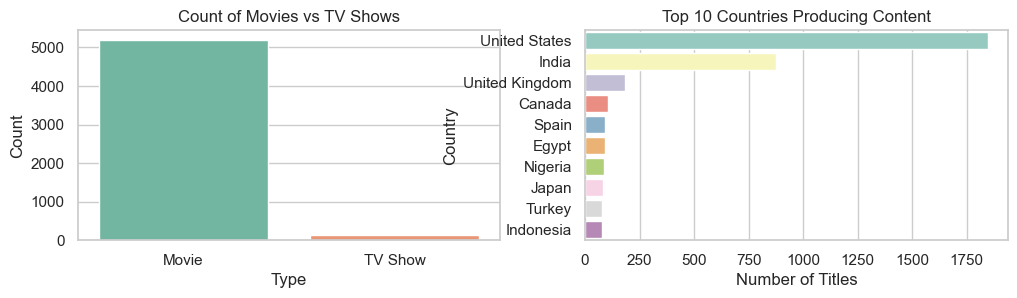

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Count of Movies vs TV Shows
plt.subplot(2, 2, 1)
sns.countplot(data=cleaned_data, x="type", palette="Set2")
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")

# 2. Top 10 Countries Producing Content
top_countries = cleaned_data['country'].value_counts().head(10)
plt.subplot(2, 2, 2)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="Set3")
plt.title("Top 10 Countries Producing Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")


C:\Users\Zeeno\AppData\Local\Temp\ipykernel_1924\2305683619.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette="viridis")


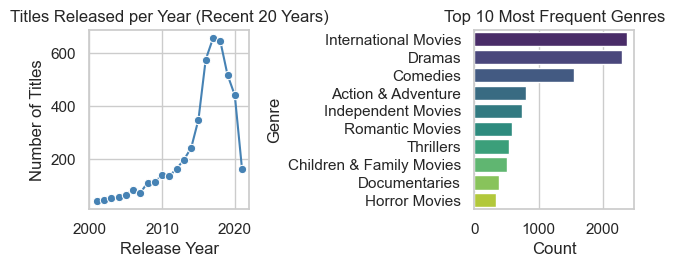

In [6]:
# 3. Count of Titles per Release Year (last 20 years)
recent_years = cleaned_data[cleaned_data['release_year'] >= cleaned_data['release_year'].max() - 20]
year_counts = recent_years['release_year'].value_counts().sort_index()
plt.subplot(2, 2, 3)
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color="steelblue")
plt.title("Titles Released per Year (Recent 20 Years)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")

# 4. Most Frequent Genres (Top 10)
from collections import Counter
# Flatten genre list
genre_list = cleaned_data['listed_in'].str.split(', ').sum()
top_genres = Counter(genre_list).most_common(10)
genres, counts = zip(*top_genres)
plt.subplot(2, 2, 4)
sns.barplot(x=list(counts), y=list(genres), palette="viridis")
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Count")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()


In [7]:
# Clone the cleaned dataset to avoid modifying original
feature_data = cleaned_data.copy()

#Feature Engineering & Model Preparation

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
type_encoder = LabelEncoder()

# Apply encoding to the 'type' column
feature_data['type_encoded'] = type_encoder.fit_transform(feature_data['type'])
# Check the encoded values

print(feature_data['type_encoded'].head())
print(feature_data['type_encoded'].unique())

7     0
8     1
9     0
12    0
24    0
Name: type_encoded, dtype: int64
[0 1]


In [9]:
feature_data['type'] = feature_data['type'].map({'Movie': 0, 'TV Show': 1})

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
import numpy as np

# 2. Extract numerical duration
# Convert 'duration' column to numeric: extract minutes or seasons
def parse_duration(x):
    try:
        return int(x.split(' ')[0])
    except:
        return np.nan

feature_data['parsed_duration'] = feature_data['duration'].apply(parse_duration)

In [11]:
# 3. Encode genres using MultiLabelBinarizer
# 'listed_in' contains comma-separated genres -> we turn them into binary features
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(feature_data['listed_in'].str.split(', '))
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

In [12]:
# 4. Encode country using Label Encoding (for simplicity — OneHot can be too sparse)
from sklearn.preprocessing import LabelEncoder
country_encoder = LabelEncoder()
feature_data['country_encoded'] = country_encoder.fit_transform(feature_data['country'])

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np


In [14]:
# Do NOT include parsed_duration anymore — per your updated objective
final_features = pd.concat([
    feature_data[['type', 'release_year', 'country_encoded']],  # ← no parsed_duration
    genres_df
], axis=1)

final_features = final_features.fillna(0)

# Refit the scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(final_features)

# Refit the model with matching features
model = NearestNeighbors(n_neighbors=10, algorithm='auto')
model.fit(X_scaled)


NearestNeighbors(n_neighbors=10)

In [ ]:
def recommend_content(genre_input, type_input, release_year_input, country_input):
    try:
        # Normalize inputs
        genre_input = [g.strip().title() for g in genre_input]
        content_type = 'Movie' if type_input == 0 else 'TV Show'
        
        # Step 1: Initial filtering
        filtered_data = cleaned_data[
            (cleaned_data['type'] == content_type) &
            (cleaned_data['country'].str.contains(country_input, case=False, na=False)) &
            (cleaned_data['release_year'] >= release_year_input)
        ].copy()
        
        # Step 2: Genre matching function
        def genres_match_at_least_two(genres_str):
            if pd.isna(genres_str):
                return False
            content_genres = [g.strip().title() for g in genres_str.split(',')]
            return sum(1 for g in genre_input if g in content_genres) >= 2
        
        # Apply genre filter
        filtered_data = filtered_data[
            filtered_data['listed_in'].apply(genres_match_at_least_two)
        ]
        
        # If no results after filtering, return empty DataFrame early
        if filtered_data.empty:
            return pd.DataFrame()

        # Step 3: Prepare features for the filtered subset
        filtered_indices = filtered_data.index.intersection(genres_df.index)
        filtered_genres_df = genres_df.loc[filtered_indices]
        
        filtered_features = pd.concat([
            filtered_data[['type', 'release_year', 'country_encoded']],
            filtered_genres_df
        ], axis=1).fillna(0)

        # Step 4: Fit NearestNeighbors on filtered data
        filtered_scaled = scaler.transform(filtered_features)
        local_model = NearestNeighbors(n_neighbors=min(10, len(filtered_data)), algorithm='auto')
        local_model.fit(filtered_scaled)

        # Step 5: Prepare user input vector
        user_input = pd.DataFrame([{
            'type': type_input,
            'release_year': release_year_input,
            'country_encoded': country_encoder.transform([country_input])[0]
        }])
        
        # Add genre columns
        for genre in mlb.classes_:
            user_input[genre] = 1 if genre in genre_input else 0
            
        user_input_scaled = scaler.transform(user_input)

        # Step 6: Get recommendations
        distances, indices = local_model.kneighbors(user_input_scaled)
        recommendations = filtered_data.iloc[indices[0]]
        
        return recommendations[['title', 'listed_in', 'type', 'duration', 'country', 'rating', 'description']]
        
    except Exception as e:
        print(f"Error in recommendation: {str(e)}")
        return pd.DataFrame()

In [35]:
# Simple test case

# Example user input
genre_input = ['Horror', 'Action', 'Dramas'  ]
type_input = 0  # 0 = Movie, 1 = TV Show
release_year_input = 2000
country_input = 'United States'

# Get recommendations
recommendations = recommend_content(genre_input, type_input, release_year_input, country_input)
print(recommendations)

Empty DataFrame
Columns: []
Index: []
